In [53]:
using Pkg
#Pkg.add("Gadfly")
@doc NearestNeighbors
varinfo(NearestNeighbors)

InteractiveUtils.varinfo

In [6]:
using StatsPlots
using CSV, DataFrames
#using NearestNeighbors
using NearestNeighbors
#using Gadfly

file = "../usedcars.csv"
df = DataFrame(CSV.File(file)); #|> DataFrame!
names(df)
mileage = df[:mileage];
price = df[:price];
scatter(mileage,price)

In [67]:



x = convert(Array,df[:price])#:mileage]); #features
y = convert(Array,df[:mileage]);
z = [collect(x);collect(y)]
println(typeof(z))

df1 = df[:, [:price, :mileage]];

x = rand(2,size(mileage)[1])
x[1,:] = mileage;
x[2,:] = price;
#KDTree
kdtree = KDTree(x; leafsize = 2)
k = 10
len = size(mileage)[1]-1
point = range(1,step=1,stop=25)

@time idxs, dists = knn(kdtree, price, 4, false)#, true)

#plot(mileage)
idxs
scatter(idxs,dists)#,dists)
#scatter(mileage,price)
#size(dists)
#size(idxs)

Array{Union{Missing, Float64},1}


MethodError: MethodError: no method matching knn(::KDTree{StaticArrays.SArray{Tuple{2},Float64,1,2},Euclidean,Float64}, ::Array{Union{Missing, Int64},1}, ::Int64, ::Bool)
Closest candidates are:
  knn(::NNTree{V,P} where P<:Distances.Metric, !Matched::Array{T<:(AbstractArray{T,1} where T),1}, ::Int64, ::Any) where {V, T<:(AbstractArray{T,1} where T)} at /home/russell/.julia/packages/NearestNeighbors/N7lgR/src/knn.jl:16
  knn(::NNTree{V,P} where P<:Distances.Metric, !Matched::Array{T<:(AbstractArray{T,1} where T),1}, ::Int64, ::Any, !Matched::Function) where {V, T<:(AbstractArray{T,1} where T)} at /home/russell/.julia/packages/NearestNeighbors/N7lgR/src/knn.jl:16
  knn(::NNTree{V,P} where P<:Distances.Metric, !Matched::AbstractArray{T<:Number,1}, ::Int64, ::Any) where {V, T<:Number} at /home/russell/.julia/packages/NearestNeighbors/N7lgR/src/knn.jl:40
  ...

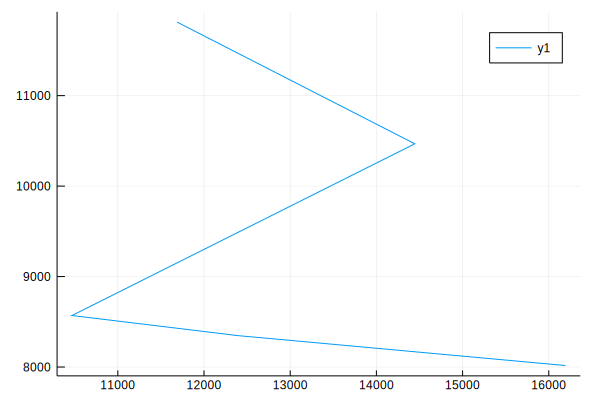

In [14]:
plot(idxs,dists)

#kdtree = KDTree(m')
# knn(kdtree, 10, 2, true)
#idxs, dists = knn(kdtree, 10, )#, sortres = false)#, skip = always_false)# -> idxs, dists

# Assignment 3

```R
library("compiler")
mse = function(y,yhat) {
  return(sum((y-yhat)^2))
}
doknn = function(x,y,xp,k) {
   kdo=k[1]
   train = data.frame(x,y=y)
   test = data.frame(xp); names(test) = names(train)[1:(ncol(train)-1)]
   near  = kknn(y~.,train,test,k=kdo,kernel='rectangular')
   return(near$fitted)
}
```
Rstudio seemed intolreably slow. I had to escape R studio, and learn how to compile functions, which took some time.


Does the plot of the prices make sense?
In order to answer that question I plotted the data.
``` R
mileage = usedcars['mileage']
price = usedcars['price']
```
price as a function of mileage


#![price as a function of mileage](/home/russell/git/MLR/production#/mileage_versus_price.png)
There is a discontinuity in the data, which can best be explained by missing values, that were not imputed, perhaps these belonged to a particular year.


In order to sanity check, that I have the axis of orientated correcly. I checked the maximum and mininum values. I used the known information a second hand car will not cost 0dollars, but it might have hardly any mileage (8 miles). The relationship makes sense cars that are driven less on average cost more,  because of depreciation. In other words people will pay more for reduced mileage, as this relates to less mechanical failure.


prices = [~600,~80,000]
mileage = [~10,500,000]

A car that is only 600 seems plausible.
summary(prices)
 Min.   :  599
 Max.   :79999

A second hard car that was driven for only 8 miles is plausible.
 summary(mileage)
 Min.   :     8
 Max.   :488525

Here is a plot of just the correlation. It's a terrible fit.
![Here is a plot of just the correlation. It's a terrible fit.](/production/just_correlation.png)

This plot is an example of using  kmeans regression. k means using 45 neighbours.
![This plot is an example of using  kmeans regression. k means using 45 neighbours.](/production/kmeans45.png)

Using K 450 makes a really smooth fit, but perhaps we have overfitted, with an overly complex and not generalizable model

This plot is an example of using kmeans regression. k means using 45 neighbours.
![This plot is an example of using kmeans regression. k means using 45 neighbours.](/production/with_correct_fit_index.png)

This plot is an example of using  kmeans optimal/ versus rectangular methods, where green is optimal and red is rectangular, the optimal method looks smoother, both methods where computed using k =45.
![This plot is an example of using  kmeans regression using k =45.](/production/optimal_versus_rectangular.png)
```R
Browse[1]> print(paste('the price at 10000 from kmeans is: ',kfit1$fitted[10000]))
[1] "the price at 10000 from kmeans is:  28109.0822222222"

[1] "the price at 10000 from linear regression is:  24999.6559809961"

The price using a GLM fitted to the data, using a poisson distribution is:
linear$fitted.values[10000])
[1] 2941.923

```

I used all of the provided cross validation methods, that used Least Square Error function, in scripts provided, this funtion, and functions nested in it, perform, the k-nearest neighbours algorithm, over `k` neighbours (adjusted between the range of `1-145` provided as a function argument, and it finds the least square error, associated with the fit. In this case adding more and more neighbours into the fit, smoothed out the prediction, adding more neighbours reduced model complexity (in this case variability). I didn't find a limit to how much increasing K improved out of sample predictions, but I did observe diminishing returns, when K started approaching the half the total number of samples (N/2)
 

```R
matrix<-foreach(k=1:145 ,.combine=cbind) %dopar% {       do_cv_knn(data.frame(mileage),price,k,nfold=5,doran=TRUE,verbose=TRUE)
}
plot_against = rep(1:length(matrix))
plot(plot_against,matrix)
This plot is an example of using  kmeans regression using k =45:
```

![This plot is an example of using  kmeans regression using k =45.](/production/plot_of_cross_validation.png)
```R
library("compiler")
cmpfun(docv)
cmpfun(docvknn)
library(doParallel)
sessionInfo() #see what packages were loaded
registerDoParallel(cores=8)
cat("number of workers is: ",getDoParWorkers(),"\n")
require("kknn")
library(kknn)
cmpfun(kknn)
cmpfun(lines)
cmpfun(abline)
cmpfun(points)

price = usedcars['price']
mileage = usedcars['mileage']

price = price[,1]
mileage = mileage[,1]

plot(mileage,price,col='blue')

year_indexs = which(years %in% 2008)
price = price[,1]
mileage = mileage[,1]
reduced_prices = price[year_indexs]
reduced_mileage = mileage[year_indexs]
plot(reduced_mileage,reduced_prices,col='blue')
```
This plot is of price versus mileage on the 2008 model cars only.
![This plot is of price versus mileage on the 2008 model cars only.](/production/2008_only.png)

cmpfun(docvknn)
```
Browse[3]> kfit1 <- k_stuff(reduced_prices,reduced_mileage)
For a 2008 model car the, the price at 75,000 from kmeans is:  26546.54"
```

Code for simulating data, then hacking the K-nearest neighbours script.
```R
library(kknn)

beta <- 0.05
n <- 100#length(100)
temp <- data.frame(y = exp(beta * seq(n)) + rnorm(n), x = seq(n))

# fit non-linear model
mod <- nls(y ~ exp(a + b * x), data = temp, start = list(a = 0, b = 0))
simulated_data <- predict(mod, list(x = temp$x))
x_jitter_large <- jitter(simulated_data,factor = 10,amount=10)   # Jitter with large factor
simulated_data <- x_jitter_large

plot(simulated_data)#, xlim = c(min, 6))   # Correlation plot after using large factor
# add fitted curve
lines(temp$x, simulated_data)
medv <- temp$x
lstat <- simulated_data
######################################################################
#if(1) {cat("### run sim\n")
kvec=c(1,2,3)#150)
nsim=30
fit1=rep(0,nsim)
fit2=rep(0,nsim)
fit3=rep(0,nsim)
train = data.frame(lstat,medv)
plot(lstat,medv)
test = data.frame(lstat=sort(lstat))
par(mfrow=c(2,3))
ntrain=20
fitind = 40
ylm = c(10,25)
gknn = kknn(medv~lstat,train,data.frame(lstat=test[fitind,1]),k=40,kernel = "rectangular")
set.seed(99)
for(i in 1:nsim) {
   ii = sample(1:nrow(train),ntrain)
   kfit1 = kknn(medv~lstat,train[ii,],test,k=kvec[1],kernel = "rectangular")
   kfit2 = kknn(medv~lstat,train[ii,],test,k=kvec[2],kernel = "rectangular")
   kfit3 = kknn(medv~lstat,train[ii,],test,k=kvec[3],kernel = "rectangular")

   plot(lstat,medv,col="lightgray")
   points(lstat[ii],medv[ii],col="blue",pch=16)
   lines(test$lstat,kfit1$fitted,col="red",lwd=2)
   points(test[fitind,1],kfit1$fitted[fitind],col="green",pch=17,cex=2)

   plot(lstat,medv,col="lightgray")
   lines(test$lstat,kfit2$fitted,col="red",lwd=2)
   points(test[fitind,1],kfit2$fitted[fitind],col="green",pch=17,cex=2)

   plot(lstat,medv,col="lightgray")
   lines(test$lstat,kfit3$fitted,col="red",lwd=2)
   points(test[fitind,1],kfit3$fitted[fitind],col="green",pch=17,cex=2)

   fit1[i]=kfit1$fitted[fitind]
   boxplot(fit1[1:i],ylim=ylm)
   abline(h=gknn$fitted,col="red")

   fit2[i]=kfit2$fitted[fitind]
   boxplot(fit2[1:i],ylim=ylm)
   abline(h=gknn$fitted,col="red")

   fit3[i]=kfit3$fitted[fitind]
   boxplot(fit3[1:i],ylim=ylm)
   abline(h=gknn$fitted,col="red")

}
```

The following code
```R
x = price
y = mileage
price <- y
mileage <- x
kfit1 = kknn(mileage~price,train,test,k=450,kernel = "rectangular")
#fit1 = kfit1$fitted[fitind]
par()
plot(mileage,price,col="lightgray")
points(mileage,price,col="blue",pch=16)
lines(test$price,kfit1$fitted,col="red",lwd=2)
print(paste('the price at 10000 from kmeans is: ',kfit1$fitted[10000]))
points(test[fitind,1],kfit1$fitted[fitind],col="green",pch=17,cex=2)
relation <- lm(price~mileage)

print(paste('the price at 10000 from linear regression is: ',relation$fitted.values[10000]))
contents = docvknn(data.frame(mileage),price,150,nfold=5,doran=TRUE,verbose=TRUE)

#plot(mileage,price,col="lightgray")
abline(relation,col="green",pch=17,cex=2)
#dev.off()
set.seed(99)
compare <- TRUE
if (compare==TRUE){
  kfito = kknn(mileage~price,train,test,k=80,kernel = "optimal")
  par()
  plot(mileage,price,col="lightgray")

  kfitr = kknn(mileage~price,train,test,k=80,kernel = "rectangular")
  #fitr = kfitr$fitted[fitind]
  lines(test$price,kfitr$fitted,col="red",lwd=2)
  lines(test$price,kfito$fitted,col="red",lwd=2)
  abline(relation,col="green",pch=17,cex=2)
  #dev.off()
}





matrix<-foreach(i=1:length(kvec),.combine=cbind) %pardo% {
   k <- kvec[i]
   thing_to_print <-paste('iteration number: ', kvec[i])
   print(thing_to_print)
   fname = paste('k_number_kmeans',kvec[i],'.png')
   #png(fname,type="cairo")
   par()
   kfit1 = kknn(price~mileage,train,test,k=k,kernel = "rectangular")
   fit1[i] = kfit1$fitted[fitind]

   plot(mileage,price,col="lightgray")
   points(mileage,price,col="blue",pch=16)
   lines(test$price,kfit1$fitted,col="red",lwd=2)
   points(test[fitind,1],kfit1$fitted[fitind],col="green",pch=17,cex=2)
   relation <- lm(price~mileage)
   plot(mileage,price,col="lightgray")
   abline(relation,col="green",pch=17,cex=2)
   #dev.off()

   fname = paste('the_box_plots',k,'.png')
   #png(fname,type="cairo")
   boxplot(fit1[i])
   abline(h = kfit1$fitted,col="red")
   #dev.off()
 }
```
I explained the bias variance trade-off to my friend Anthony. I used terms, like model complexity.


In [38]:
function get_k_nearest_neighbors(xTrain, imageI, k)
 nRows, nCols = size(xTrain) 
 imageJ = Array(Float32, nRows)
 distances = Array(Float32, nCols) 
 for j in 1:nCols
  for index in 1:nRows
   imageJ[index] = xTrain[index, j]
  end
  distances[j] = euclidean_distance(imageI, imageJ)
 end
 sortedNeighbors = sortperm(distances)
 kNearestNeighbors = sortedNeighbors[1:k]
 return kNearestNeighbors
end 


function assign_label(xTrain, yTrain, k, imageI)
 kNearestNeighbors = get_k_nearest_neighbors(xTrain, imageI, k) 
 counts = Dict{Int, Int}() 
 highestCount = 0
 mostPopularLabel = 0
 for n in kNearestNeighbors
  labelOfN = yTrain[n]
  if !haskey(counts, labelOfN)
   counts[labelOfN] = 0
  end
  counts[labelOfN] += 1 #add one to the count
  if counts[labelOfN] > highestCount
   highestCount = counts[labelOfN]
   mostPopularLabel = labelOfN
  end 
 end
 return mostPopularLabel
end

assign_label (generic function with 1 method)

In [40]:


k = 3 # The CV accuracy shows this value to be the best.
yPredictions = (vcat for i in 1:size(x, 2))
 nRows = size(x, 1)
 imageI = Array(Float32, nRows)
 for index in 1:nRows
  imageI[index] = xTest[index, i]
 end
 assign_label(xTrain, y, k, imageI)
end

#Convert integer predictions to character
#labelsInfoTest["Class"] = char(yPredictions)

#Save predictions
#writetable("$(path)/juliaKNNSubmission.csv", labelsInfoTest, separator=',', header=true)

MethodError: MethodError: no method matching Array(::Type{Float32}, ::Int64)
Closest candidates are:
  Array(!Matched::LinearAlgebra.UniformScaling, ::Integer, !Matched::Integer) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/LinearAlgebra/src/uniformscaling.jl:345

In [47]:
using Base.Math
using kNN
using StatsBase

rand(1)
n = 1_000
x = 10 * randn(n)
y = 0.5 * randn(n)

fit = kernelregression(x, y, kernel = :gaussian)
grid = minimum(x):0.1:maximum(x)
predictions = predict(fit, grid)

UndefVarError: UndefVarError: kernelregression not defined